# Customizing figures

The general process of customization

1. Create your plot in pandas or seaborn
2. Format the figure as much as possible from *within* the pandas or seaborn function. I have some info on that below. 
3. If/when necessary, use `matplotlib` to customize the figure. 
    - Google a lot 
    - Try to borrow and repurpose code you find online

````{margin}
_Note: Getting from "a good figure" to a great one takes a lot of work._ 

Getting from this

```{image} img/ft_start.png
:alt: ft_fig
:align: center
```

to this 

```{image} img/perfected_ft_fig.png
:alt: ft_fig
:align: center
```

[took a lot of code](https://datascience.quantecon.org/pandas/matplotlib.html#the-want-operator-replicate-a-professional-figure)... and imagination!
````


```{admonition} After you create a figure object, subsequent calls to that object will modify it
:class: tip 
Copy this code below into a python file and run it. Then uncomment out the next line, and rerun. See the change it made. Then uncomment the next line, rerun, and so on. 
```

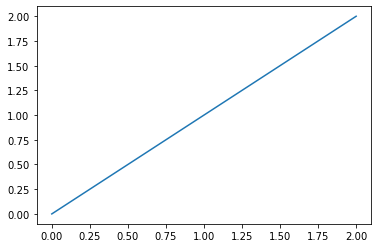

In [1]:
### THIS IS A SILLY ILLUSTRATION! LOOK AT THE DROP DOWNS BELOW, AND 
### THE EXAMPLES THROUGHOUT, FOR MORE REALISTIC SET UPS FOR HOW
### WE MODIFY PLOTS FROM PANDAS/SEABORN FUNCTIONS

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')       # creates plt obj
# plt.plot(x, x**2, label='quadratic') # adds another plot on top
# plt.plot(x, x**3, label='cubic')     # again

# plt.xlabel('x label')
# plt.ylabel('y label')
# plt.title("Simple Plot")

# plt.legend()

# plt.show()

```{warning}
That example above is just to illustrate how we modify figure objects. In practice, I doubt you will ever plot with the `plt.plot()` function. 

Since, you'll use pandas and seaborn, when you modify figure objects, you'll usually be modifying objects you name `fig` or `ax` (or similar, like `f1`, `f2`, etc...)

```

````{dropdown} Formatting plots in pandas

1. Optional: Set up the size of your overall figure and create `fig` and `ax` objects so you can manipulate the figures:  `fig, ax = plt.subplots(figsize=(width in inches,height))`. 
    - Advanced use: If you are **manually** creating subfigures, use `fig, ax = plt.subplots(#,#,figsize=(width in inches,height))` to tell it how many rows and columns of subfigures to set up.
2. `ax = <plot commands>`, e.g. `ax = df.plot()`
3. The pandas plot function can set your title and change many elements as arguments. [See the documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) 
    - Ex: `ax = df.plot(title="My Title")`
3. Modify the figure by accessing the `fig` and `ax` commands as needed.

Remember, there are many ways to customize plots! Here is one set of steps you might use:
```python
fig, ax = plt.subplots(figsize=(<width>,<height>))
ax = <df.plot()>
ax.<customizations>
fig.<customizations>
```

````

````{dropdown} Formatting plots in seaborn

1. Optional: Set up the size of your overall figure and create `fig` and `ax` objects so you can manipulate the figures:  `fig, ax = plt.subplots(figsize=(width in inches,height))`. 
    - Advanced use: If you are **manually** creating subfigures, use `fig, ax = plt.subplots(#,#,figsize=(width in inches,height))` to tell it how many rows and columns of subfigures to set up.
2. `ax = <plot commands>`, e.g. `ax = sns.lineplot(data=df,x='x',y='y')`
    - Alt: Assign the plot to ax within the function, e.g. `sns.lineplot(data=df,x='x',y='y',ax=ax)`
3. You can frequently modify `sns` plots with a method chain, e.g. `sns.lineplot(data=df,x='x',y='y').set(title="My Title",xlabel="X")`
3. Modify the figure by accessing the `fig` and `ax` commands as needed.

Remember, there are many ways to customize plots! Here is one set of steps you might use:
```python
fig, ax = plt.subplots(figsize=(<width>,<height>))
ax = <sns.function()> 
ax.<customizations>
fig.<customizations>
```

````

For changes outside the `pd` and `sns` plot functions: Honestly, [I can't do much better than this page.](https://pbpython.com/effective-matplotlib.html)


## Practice: Fixer Upper

Let's say I want to plot the average leverage for firms in different industries before and after the 2008 financial crisis, and I wanted to see how it evolved for HIGH LEVERAGE industries vs. LOW LEVERAGE industries.

The code (hidden) below spits out the raw content. 

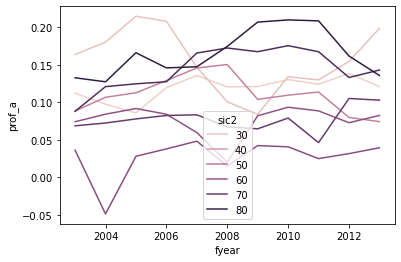

In [2]:
#!pip install plotly
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # pip install plotly.. the animation below is from plotly module
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

url = 'https://github.com/LeDataSciFi/data/blob/main/Firm%20Year%20Datasets%20(Compustat)/CCM_cleaned_for_class.zip?raw=true'

#firms = pd.read_stata(url)   <-- would work, but GH said "too big" and forced me to zip it, 
# so here is the work around to download it:

with urlopen(url) as request:
    data = BytesIO(request.read())

with ZipFile(data) as archive:
    with archive.open(archive.namelist()[0]) as stata:
        ccm = pd.read_stata(stata)

# get industry-avg leverage (for each year)        
# I use 2 digit SIC codes here to define an industry

ccm['sic3'] = pd.to_numeric(ccm['sic3'], errors='coerce')

sic2_year = (ccm
    .assign(sic2 = ccm['sic3']//10) 
    .query('fyear >= 2003 & fyear <= 2013 & sic2 != 99 & sic2 != 41')
    .groupby(['sic2','fyear'])
    [['td_a','prof_a']].mean()
)

# reduce to hi/lo lev industrys 

lo4 = sic2_year.query('fyear == 2007')['td_a'].sort_values().reset_index()['sic2'][:4].to_list()
hi4 = sic2_year.query('fyear == 2007')['td_a'].sort_values().reset_index()['sic2'][-4:].to_list()
inds_to_examine = lo4.copy()
inds_to_examine.extend(hi4)

# add industry labels to dataset

sic2_labels = pd.DataFrame({
    'sic2': [82.0, 31.0, 63.0, 47.0, 70.0, 27.0, 75.0, 61.0], 
    'sic2_ind': ['Educational Services','Leather Products','Insurance Carriers','Transportation Services',
                 'Hotels','Printing & Publishing','Auto Repairs','Nondepository Institutions']})
sic2_year = sic2_year.reset_index().merge(sic2_labels,on='sic2')

# add hi/lo industry leverage variable

sic2_year['Group'] = 'High Lev Industries'
sic2_year.loc[ sic2_year['sic2'].isin(lo4), 'Group'] = 'Low Lev Industries'

ax = sns.lineplot(data = sic2_year, x = 'fyear', y='prof_a', hue='sic2')


**BUT WOW IS THIS UGLY AND ALMOST USELESS**
1. Which series is which industry? (color scales mean nothing here)
2. Which series are the high leverage industries? Which are low?
3. Bad axis titles
4. The legend is on top of the data    
5. OMG: The legend is showing **the wrong industry numbers** (it should be 47, 31, 82, ...)

![](https://media.giphy.com/media/6BHo4gLh9rqtW/giphy.gif)

Let's take a first pass at cleaning this up:
- The lineplot documentation doesn't allow for facets with the `col` parameter, but the bottom of the documentation says `relplot` can facet lineplots
- So `relplot` + `kind="line"` = same graph
- And `relplot` + `kind="line"` + `col='Group'` adds facets for high/low lev industries
- remove the legend, we will add text labels later
- Set the title, facet titles, axis titles (a little trickier because of the facts)

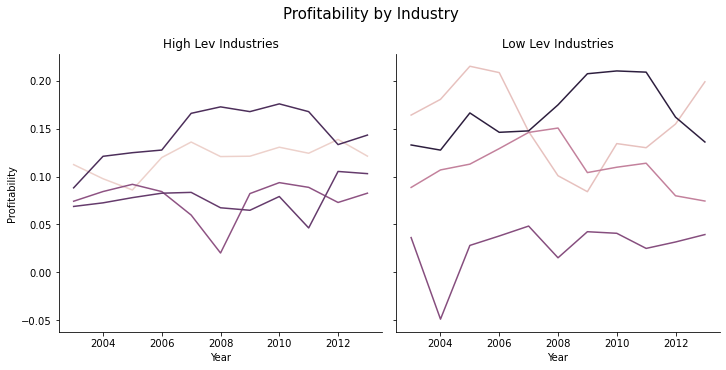

In [3]:
# I call this "g" to follow convention in sns documentation
# "g" is the whole facet "g"rid object relplot creates

g = sns.relplot(data = sic2_year, x = 'fyear', y='prof_a', 
                hue='sic2', kind='line', col='Group',
                legend=False)
g.fig.suptitle('Profitability by Industry', fontsize=15, )
g.fig.subplots_adjust(top=0.85) # Reduce plot to make room 
g.set_axis_labels("Year", "Profitability")
g.axes[0][0].set_title('High Lev Industries')
g.axes[0][1].set_title('Low Lev Industries')
print()

Now we just need to add labels so we know what lines are which industries. This is a little messy. 

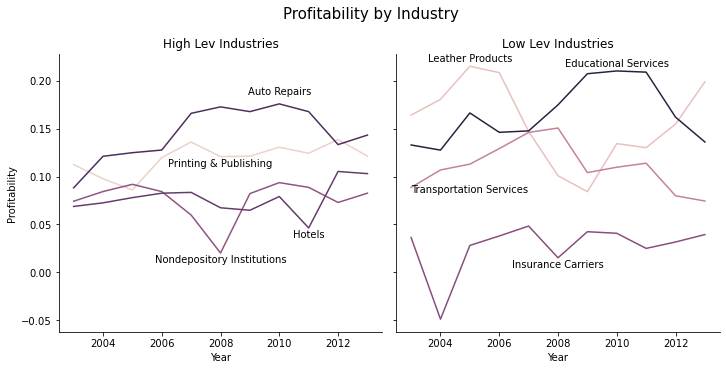

In [4]:
# remake the graph

g = sns.relplot(data = sic2_year, x = 'fyear', y='prof_a', 
                hue='sic2', kind='line', col='Group',
                legend=False)
g.fig.suptitle('Profitability by Industry', fontsize=15, )
g.fig.subplots_adjust(top=0.85) # Reduce plot to make room 
g.set_axis_labels("Year", "Profitability")
g.axes[0][0].set_title('High Lev Industries')
g.axes[0][1].set_title('Low Lev Industries')

# now set up the labels to replace the legend - I'm going for "excellent"

# I'll put the labels on these data points

ind_year_for_labels = '(fyear == 2008 & sic2 == 61) | (fyear == 2011 & sic2 == 70) | (fyear == 2010 & sic2 == 75) |' + \
                      '(fyear == 2008 & sic2 == 27) | (fyear == 2010 & sic2 == 82) | (fyear == 2005 & sic2 == 31) |' + \
                      '(fyear == 2008 & sic2 == 63) | (fyear == 2005 & sic2 == 47)'

# and each one will be higher or lower than it's data point by 
# some amount so that text doesnt cover the lines

sic2_year['y_offset'] = -.01
sic2_year.loc[ sic2_year['sic2'] == 75, 'y_offset'] = .01 # autorepairs
sic2_year.loc[ sic2_year['sic2'] == 47, 'y_offset'] = -.03 # trans
sic2_year.loc[ sic2_year['sic2'] == 31, 'y_offset'] = .005 # leather
sic2_year.loc[ sic2_year['sic2'] == 82, 'y_offset'] = .005 # edu

# this funct will add the text to a subfigure

def label_point(df, x, y, val, ax, y_offset):
    for i, point in df.iterrows():
        ax.text(point[x], point[y]+point[y_offset], str(point[val]),horizontalalignment='center')

# add the labels to the graph

high_sub = sic2_year.query('Group == "High Lev Industries" & ('+ind_year_for_labels+')')
label_point(high_sub,'fyear','prof_a','sic2_ind', g.axes[0][0],'y_offset')  

high_sub = sic2_year.query('Group == "Low Lev Industries" & ('+ind_year_for_labels+')')
label_point(high_sub,'fyear','prof_a','sic2_ind', g.axes[0][1],'y_offset')  


That's still not perfect, but it's much easier to interpret. 
